# Table of Contents:


1. [Gathering Data](#gather)
2. [Assesing Data](#assisng)
3. [Coying DataFrame](#copy)
4. [Cleaning DataFrames](#clean)
5. [Visualisations and insights](#vs)

### 1- Gathering data
<a id="gather"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests as rq
import json as js

A. Enhanced twitter archive

In [2]:
df_1 = pd.read_csv("twitter-archive-enhanced.csv")

B. Image predictions

In [3]:
### Requesting the file hosted in the udacity server.
data = rq.get(" https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
with open("img-predictions.tsv", "wb") as file:
    file.write(data.content)

In [4]:
df_img = pd.read_csv("img-predictions.tsv", sep = "\t")

In [5]:
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


C. Twiiter API Data
NOTE: I didn't get a twitter developer account so I used the files of tweet-json.txt to complete the task

In [7]:
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760


KeyboardInterrupt: 

--- Importing the contents of the tweet-json.txt into a list ---

In [6]:
jslist = []
with open("tweet-json.txt") as tjs:
    for l in tjs:
        jslist.append(js.loads(l))
    
js_df = pd.DataFrame(jslist, columns = ["id", "favorite_count", "retweet_count"])
js_df = js_df.rename(columns = {"id": "tweet_id"})

js_df.to_csv("json_data.csv", index = False)

In [7]:
tweet_df = pd.read_csv("json_data.csv")

In [8]:
tweet_df.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


### 2- Asseesing Data:
<a id="assisng"></a>

* Twitter Archive

In [9]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### A. Quality Isuues:
     - timestamp has an object(String) datatype and it has to be datetime.
     - a lot of Null Values are found in in_reply_to_status_id. 
     - a lot of Null Values are found in in_reply_to_user_id.
     - retweeted_timestamp has an object(String) datatype and it has to be datetime.
     - a lot of Null Values are found in retweeted_status_timestamp.
     - a lot of Null Values are found in retweeted_status_id.
     - a lot of Null Values are found in retweeted_status_user_id. 
     - the tweet_id is integer instead of string, we don't need to make any mathematical operations on it.
     - retweeted_status_id is a float and hast to be string.

In [10]:
df_1.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2324,666421158376562688,NaN,NaN,2015-11-17 01:02:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*internally screaming* 12/10 https://t.co/YMcr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666421158...,12,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
397,825120256414846976,NaN,NaN,2017-01-27 23:16:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to Pablo. He's one go...,8.250266e+17,4.196984e+09,2017-01-27 17:04:02 +0000,https://www.gofundme.com/my-puppys-double-cata...,12,10,Pablo,None,None,None,puppo
2144,669942763794931712,NaN,NaN,2015-11-26 18:16:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Andru. He made his very own lacrosse s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669942763...,11,10,Andru,None,None,None,None
1565,688064179421470721,NaN,NaN,2016-01-15 18:24:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kilo. He's a Pouncing Brioche. Really ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688064179...,11,10,Kilo,None,None,None,None
1784,677662372920729601,NaN,NaN,2015-12-18 01:31:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",In honor of the new Star Wars movie. Here's Yo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677662372...,12,10,None,None,None,None,None
735,781163403222056960,NaN,NaN,2016-09-28 16:07:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...","We normally don't rate lobsters, but this one ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/781163403...,10,10,None,None,None,None,None
235,847606175596138505,NaN,NaN,2017-03-31 00:27:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cannon. He just heard something behind...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/847606175...,12,10,Cannon,None,None,None,None
1600,686007916130873345,NaN,NaN,2016-01-10 02:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper has a magical eye. 11/10 I can't s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686007916...,11,10,None,None,None,pupper,None
1967,673342308415348736,NaN,NaN,2015-12-06 03:24:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Django. He's a skilled assassin pupper...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673342308...,10,10,Django,None,None,pupper,None


    - there are some values of numerator less than 10
    - There are some names not found.
    - There are Multiple retweets.

Now I'm trying to find some pattern to edit the name of the dogs

In [11]:
df_1.iloc[1410]["text"]

'HAPPY V-DAY FROM YOUR FAV PUPPER SQUAD 13/10 for all https://t.co/7u6VnZ1UFe'

In [12]:
df_1.iloc[1091]["text"]

"Just wanted to share this super rare Rainbow Floofer in case you guys haven't seen it yet. 13/10 colorful af https://t.co/CaG9MzD3WT"

In [13]:
df_1.iloc[1090]["text"]

'We only rate dogs. Pls stop sending in non-canines like this Slovak Car Bunny. It makes my job very difficult. 11/10 https://t.co/VflvQLH2y5'

-- Unfortunately there is no defined pattern to investigate the name of the dogs from tweet text.

In [14]:
df_1[df_1["rating_denominator"] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


    - there some rating denomenator not equal to 10

* image prediction datafreame:

In [15]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
df_img.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1682,813910438903693312,https://pbs.twimg.com/media/C0uXObSXUAAIzmV.jpg,1,Siberian_husky,0.699355,True,Eskimo_dog,0.256433,True,Norwegian_elkhound,0.013189,True
989,707969809498152960,https://pbs.twimg.com/media/CdM2xRpXEAUsR4k.jpg,1,toy_poodle,0.908491,True,miniature_poodle,0.082652,True,teddy,0.005786,False
1677,813187593374461952,https://pbs.twimg.com/media/C0kFzOQUoAAt6yb.jpg,1,golden_retriever,0.888181,True,Labrador_retriever,0.042312,True,Saluki,0.009702,True
1957,865006731092295680,https://pbs.twimg.com/media/DAEfCFXUIAA1uqj.jpg,1,Pembroke,0.989882,True,Cardigan,0.009906,True,basenji,0.000135,True
1283,750429297815552001,https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg,1,golden_retriever,0.964929,True,Labrador_retriever,0.011584,True,refrigerator,0.007499,False
545,677314812125323265,https://pbs.twimg.com/media/CWZOOIUW4AAQrX_.jpg,2,Blenheim_spaniel,0.924127,True,Japanese_spaniel,0.054790,True,Chihuahua,0.008204,True
1007,709198395643068416,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1,borzoi,0.490783,True,wire-haired_fox_terrier,0.083513,True,English_setter,0.083184,True
2000,876120275196170240,https://pbs.twimg.com/media/DCiavj_UwAAcXep.jpg,1,Bernese_mountain_dog,0.534327,True,Saint_Bernard,0.346312,True,Greater_Swiss_Mountain_dog,0.094933,True
111,667902449697558528,https://pbs.twimg.com/media/CUTdvAJXIAAMS4q.jpg,1,Norwegian_elkhound,0.298881,True,malamute,0.279479,True,Eskimo_dog,0.198428,True
138,668537837512433665,https://pbs.twimg.com/media/CUcfnWlWsAAzlwE.jpg,1,Lakeland_terrier,0.372988,True,toy_poodle,0.250445,True,Chihuahua,0.189737,True


### A. Quality Issues:
    - There are some images predicted not a dog.
    - Some Capitalized and uncapitalized preditctions.
    - the tweet_id is also integer instead of string.

* Twitter Data

In [17]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [18]:
tweet_df.sample(10)

,tweet_id,favorite_count,retweet_count
1421,697995514407682048,1665,372
828,768855141948723200,4660,1034
1239,712065007010385924,2451,700
507,812503143955202048,6787,1424
1134,728387165835677696,3999,1075
1414,698635131305795584,1400,388
2158,669567591774625800,248,61
1263,709901256215666688,732,112
968,750117059602808832,4740,1466
1153,724983749226668032,4040,1462


    - Two Missing Data

### B.Tidness Issues:
    - More than one data frame for one observations
    - in the Twitter archive data frame there dog stages which can be in one column
    - The tweet_id is integer too.

### 3- Copying the dataFrames:
<a id="copy"></a>

In [19]:
df_1_copy = df_1.copy()
tweet_df_copy = tweet_df.copy()
df_img_copy = df_img.copy()

### 4- Cleaning Data:
<a id="clean"></a>

### * Solving quality issues in archive Data Frame:

#### 1- removing columns with a lot of null values

##### the problem: 
    - we have several columns have a lot of null values and that affects the quality of the data set like: 
        * in_reply_to_status_id.
        * in_reply_to_user_id.
        * retweeted_status_user_id.
        * retweeted_status_timestamp.
     NOTE: I kept the retweeted_status_id col to remove the retweets by it.
      

In [21]:
## Code: we will drop all of these usless cloumns for our analysis.
df_1.drop(inplace = True, columns=["in_reply_to_status_id" , "in_reply_to_user_id", "retweeted_status_user_id", "retweeted_status_timestamp"])
## Testing
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             2356 non-null   int64  
 1   timestamp            2356 non-null   object 
 2   source               2356 non-null   object 
 3   text                 2356 non-null   object 
 4   retweeted_status_id  181 non-null    float64
 5   expanded_urls        2297 non-null   object 
 6   rating_numerator     2356 non-null   int64  
 7   rating_denominator   2356 non-null   int64  
 8   name                 2356 non-null   object 
 9   doggo                2356 non-null   object 
 10  floofer              2356 non-null   object 
 11  pupper               2356 non-null   object 
 12  puppo                2356 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 239.4+ KB


#### 2- Converting timestamp column to datetime datatype

##### The problem: 
    - the time stamp column in the twitter archive file is string type and the right type is datetime object.

In [22]:
### Code: useing datetime method to convert it into the right datatype
df_1["timestamp"] = pd.to_datetime(df_1["timestamp"])
## Testing 
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   tweet_id             2356 non-null   int64              
 1   timestamp            2356 non-null   datetime64[ns, UTC]
 2   source               2356 non-null   object             
 3   text                 2356 non-null   object             
 4   retweeted_status_id  181 non-null    float64            
 5   expanded_urls        2297 non-null   object             
 6   rating_numerator     2356 non-null   int64              
 7   rating_denominator   2356 non-null   int64              
 8   name                 2356 non-null   object             
 9   doggo                2356 non-null   object             
 10  floofer              2356 non-null   object             
 11  pupper               2356 non-null   object             
 12  puppo               

#### 4- Editing numerator and denominator:

##### The problem:
    - The denomniator be 10 due the standard of the WeRateDogs account, but there are some rows that have non-ten values.
    - the numerator has not acceptable values.

In [26]:
## Code: 
# Knowing the factor which the rating is multiplied by:
factor = df_1["rating_denominator"]/10
# making the ratings denomerator = 10 and multiply the numerator with the same factor:
df_1["rating_denominator"] = df_1["rating_denominator"]/factor
df_1["rating_numerator"] = df_1["rating_numerator"]/factor
# Converting the columns into integers
df_1["rating_denominator"] = pd.to_numeric(df_1["rating_denominator"])
df_1["rating_numerator"] = pd.to_numeric(df_1["rating_numerator"])
# Testing:
df_1.info()
df_1[df_1["rating_denominator"] != 10]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   tweet_id             2356 non-null   int64              
 1   timestamp            2356 non-null   datetime64[ns, UTC]
 2   source               2356 non-null   object             
 3   text                 2356 non-null   object             
 4   retweeted_status_id  181 non-null    float64            
 5   expanded_urls        2297 non-null   object             
 6   rating_numerator     2355 non-null   float64            
 7   rating_denominator   2355 non-null   float64            
 8   name                 2356 non-null   object             
 9   doggo                2356 non-null   object             
 10  floofer              2356 non-null   object             
 11  pupper               2356 non-null   object             
 12  puppo               

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,2017-02-24 21:54:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,None,None,None,None,None


#### 5- Elemenating the zero denomenator row: 

##### The problem: 
    - The is a row that the denominator was 0 and this not acceptable.

In [27]:
## Code: we are going to remove it.
df_1.drop(313, inplace = True)

# Testing: 
df_1[df_1["rating_denominator"] != 10]

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### 6- Names Issue:

##### The prolem: 
    - there are several rows that we cannot know the name of the dog.
##### Code:
    - we won't make any change on it because it's not important for our analysis.

#### 7- Retweets:

##### The problem: 
    - There are some retweets in the data and that affects the visualisations and insights.

#### Code :
    - These retweets an be known with retweeted_status_id with Nan.

In [28]:
df_1 = df_1[df_1["retweeted_status_id"].isnull()]

In [29]:
## Test:
df_1.sample(10)

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2326,666411507551481857,2015-11-17 00:24:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is quite the dog. Gets really excited whe...,NaN,https://twitter.com/dog_rates/status/666411507...,2.0,10.0,quite,None,None,None,None
1992,672614745925664768,2015-12-04 03:13:46+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Norman. Doesn't bark much. Very docile...,NaN,https://twitter.com/dog_rates/status/672614745...,6.0,10.0,Norman,None,None,pupper,None
301,836677758902222849,2017-02-28 20:41:37+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Oliver. He's pretty exotic. Fairl...,NaN,https://twitter.com/dog_rates/status/836677758...,11.0,10.0,Oliver,None,None,None,None
1099,735991953473572864,2016-05-27 00:32:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Maxaroni. He's curly af. Also rather f...,NaN,https://twitter.com/dog_rates/status/735991953...,11.0,10.0,Maxaroni,None,None,None,None
1734,679736210798047232,2015-12-23 18:51:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This pup's name is Sabertooth (parents must be...,NaN,https://twitter.com/dog_rates/status/679736210...,9.0,10.0,None,None,None,None,None
1304,707411934438625280,2016-03-09 03:45:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""I shall trip the big pupper with leash. Big p...",NaN,https://twitter.com/dog_rates/status/707411934...,11.0,10.0,None,None,None,pupper,None
976,750026558547456000,2016-07-04 18:00:41+00:00,"<a href=""https://about.twitter.com/products/tw...",Meet Jax &amp; Jil. Jil is yelling the pledge ...,NaN,https://twitter.com/dog_rates/status/750026558...,10.0,10.0,Jax,None,None,None,None
1077,739544079319588864,2016-06-05 19:47:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Tyrannosaurus rex. We only rate d...,NaN,https://twitter.com/dog_rates/status/739544079...,10.0,10.0,None,None,None,None,None
1035,744995568523612160,2016-06-20 20:49:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Abby. She got her face stuck in a glas...,NaN,https://twitter.com/dog_rates/status/744995568...,9.0,10.0,Abby,None,None,None,puppo
867,761976711479193600,2016-08-06 17:26:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Shelby. She finds stuff to put on her ...,NaN,https://twitter.com/dog_rates/status/761976711...,12.0,10.0,Shelby,None,None,None,None


#### 8- tweet_id type:

##### The problem:
    - the tweet_id column in the three dataframs has to be string not integer because we are not going to make any mathematical operations on it.

#### code:

In [30]:
### using map method
df_1["tweet_id"] = df_1["tweet_id"].map(str)
df_img["tweet_id"] = df_img["tweet_id"].map(str)
tweet_df["tweet_id"] = tweet_df["tweet_id"].map(str)

In [31]:
## Test:
df_1.info()
df_img.info()
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   tweet_id             2174 non-null   object             
 1   timestamp            2174 non-null   datetime64[ns, UTC]
 2   source               2174 non-null   object             
 3   text                 2174 non-null   object             
 4   retweeted_status_id  0 non-null      float64            
 5   expanded_urls        2117 non-null   object             
 6   rating_numerator     2174 non-null   float64            
 7   rating_denominator   2174 non-null   float64            
 8   name                 2174 non-null   object             
 9   doggo                2174 non-null   object             
 10  floofer              2174 non-null   object             
 11  pupper               2174 non-null   object             
 12  puppo               

#### 9- retweet_status_id type:

##### The problem:
    - The retweet_status_id column is float type and it have to be string for th esame reason of the tweet_id column.

##### Code:

In [32]:
df_1["retweeted_status_id"] = df_1["retweeted_status_id"].map(str)

## Test: 
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   tweet_id             2174 non-null   object             
 1   timestamp            2174 non-null   datetime64[ns, UTC]
 2   source               2174 non-null   object             
 3   text                 2174 non-null   object             
 4   retweeted_status_id  2174 non-null   object             
 5   expanded_urls        2117 non-null   object             
 6   rating_numerator     2174 non-null   float64            
 7   rating_denominator   2174 non-null   float64            
 8   name                 2174 non-null   object             
 9   doggo                2174 non-null   object             
 10  floofer              2174 non-null   object             
 11  pupper               2174 non-null   object             
 12  puppo               

### * Solving Tidness Issues in achive dataframe:

####  1- merging Dog stages into one column:

In [33]:
### Making empty array to hold the values of the stage
stage = []
for index, row in df_1.iterrows():
    if row["doggo"] != "None":
        stage.append(row["doggo"])
    elif row["pupper"] != "None":
        stage.append(row["pupper"])
    elif row["puppo"] != "None":
        stage.append(row["puppo"])
    elif row["floofer"] != "None":
        stage.append(row["floofer"])
    else: 
        stage.append(np.nan)
## Making new column with the values in the stage list
df_1["stage"] = stage

### dropping the columns from the original dataframe: 
df_1.drop(columns = ["doggo", "pupper", "puppo", "floofer"], inplace = True)


### * image prediction: 

#### 1- Solving quality issues:

#### - making all predictions lower case

In [34]:

df_img.info()
df_img["p1"] = df_img["p1"].str.lower()
df_img["p2"] = df_img["p2"].str.lower()
df_img["p3"] = df_img["p3"].str.lower()

# Testing
df_img.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


## Predicted types of animals will be as it without any change.

### Solving Some Tidness Issue:

#### merging all DataFrames into one Data frame

In [35]:
df_semi = pd.merge(df_1, df_img, on='tweet_id', how='outer')
df_final = pd.merge(df_semi, tweet_df, on="tweet_id", how="outer")

In [36]:
#Test:
pd.set_option('display.max_columns', None)
df_final.head()

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467.0,8853.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,33819.0,6514.0
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461.0,4328.0
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,42908.0,8964.0
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,41048.0,9774.0


In [37]:
### Saving new dataset into new csv file:
df_final.to_csv("twitter_archive_master.csv", index = False)

# Visualisation and some insights:
<a id="vs"></a>

## 1- average rating of different stages:


In [38]:
df_new = pd.read_csv("twitter_archive_master.csv")

In [39]:
## Making a new column of rating
df_new["rating"] = df_new["rating_numerator"] / df_new["rating_denominator"]

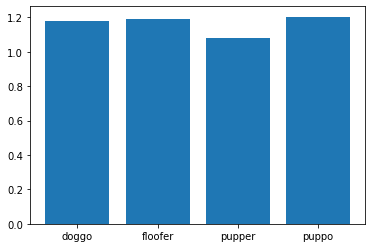

In [40]:
## To exclude None values
x1 = ["doggo", "floofer", "pupper", "puppo"]
values = [df_new.groupby("stage")["rating"].mean()["doggo"],
          df_new.groupby("stage")["rating"].mean()["floofer"],
          df_new.groupby("stage")["rating"].mean()["pupper"],
          df_new.groupby("stage")["rating"].mean()["puppo"] ]
plt.bar(x1, values);


#### Insight 1:

as we see the averages rating for all of the stages are very close to each other so there is no huge effect of the stage in the dog ratings. 

### 2- Perentages of rated dogs for every stage: 

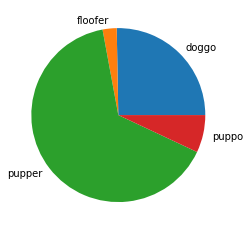

In [41]:
x2 = ["doggo", "floofer", "pupper", "puppo"]
values_2 = [df_new.groupby("stage")["rating"].count()["doggo"],
            df_new.groupby("stage")["rating"].count()["floofer"],
            df_new.groupby("stage")["rating"].count()["pupper"],
            df_new.groupby("stage")["rating"].count()["puppo"] ]

plt.pie(values_2, labels = x2);

### Insight 2:

- Most of the rated is from pupper stage, inoring the None stage tweets.

### 3 - Does the stage of the dog affects the engagement ?

In [42]:


x3 = ["doggo", "pupper","floofer" , "puppo"]
favorits = [df_new.groupby("stage")["favorite_count"].mean()["doggo"],
            df_new.groupby("stage")["favorite_count"].mean()["pupper"],
            df_new.groupby("stage")["favorite_count"].mean()["floofer"],
            df_new.groupby("stage")["favorite_count"].mean()["puppo"]]

retweets = [df_new.groupby("stage")["retweet_count"].mean()["doggo"],
            df_new.groupby("stage")["retweet_count"].mean()["pupper"],
            df_new.groupby("stage")["retweet_count"].mean()["floofer"],
            df_new.groupby("stage")["retweet_count"].mean()["puppo"]]

<BarContainer object of 4 artists>

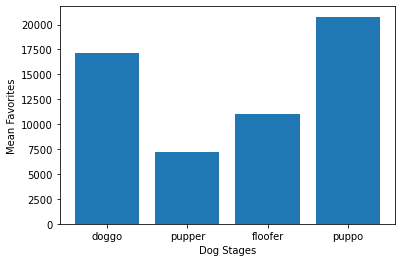

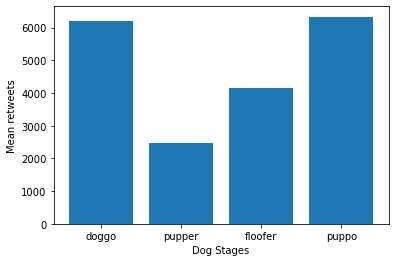

In [43]:
plt.figure(1)
plt.xlabel("Dog Stages")
plt.ylabel("Mean Favorites")
plt.bar(x3, favorits)

plt.figure(2)
plt.xlabel("Dog Stages")
plt.ylabel("Mean retweets")
plt.bar(x3, retweets)

### Insight 3:

- The Doggo and Puppo stages claims more engagements than the other stages.